# Melting curve of ice V with the TIP4P/Ice model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.optimize import curve_fit
import os.path
from matplotlib.patches import Ellipse
from scipy.interpolate import interp1d, UnivariateSpline

In [40]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.5,2.5)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

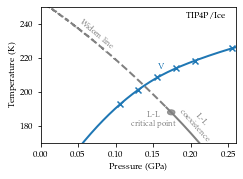

In [47]:
data=np.genfromtxt("LLT-data/max_Kt.json")
plt.plot(data[1,:]/1000,data[0,:],'--',color='gray',linewidth=2,label="Widom line")
data=np.genfromtxt("LLT-data/coexistence_up.csv")
plt.plot(data[1,:]/1000,data[0,:],color='gray',linewidth=2,label="Binodal")

thermo = np.genfromtxt("../Results/thermo_condition_iceV_TIP4PIce.txt")
plt.scatter(thermo[:,0]/10000,thermo[:,1],marker='x',color=colors[0])
f_spline = UnivariateSpline(thermo[:,0]/10000,thermo[:,1],s=0.1)
x=np.linspace(0.05,0.7,1000)
plt.plot(x,f_spline(x),color=colors[0],linewidth=2)

ellipse=Ellipse((0.1739,188),0.01,3,alpha=0.8,color='gray')
ax = plt.gca()
ax.add_patch(ellipse)

plt.text(0.16,215,"V",color=colors[0],va='center',ha='center')

plt.xlim([0.0,0.26])
plt.ylim([170,250])

plt.xlabel("Pressure (GPa)")
plt.ylabel("Temperature (K)")

plt.text(0.15,184,"L-L \n critical point",color='gray',va='center',ha='center',fontsize=8)
plt.text(0.21,182,"L-L \n coexistence",color='gray',va='center',ha='center',rotation=-48,fontsize=8)
plt.text(0.075,234,"Widom line",color='gray',va='center',ha='center',rotation=-40,fontsize=8)
plt.text(0.22,245,"TIP4P/Ice",color='black',va='center',ha='center',fontsize=9)

plt.savefig("melting-iceV-tip4pice.pdf",bbox_inches='tight')  # publication quality

plt.show()